<a href="https://colab.research.google.com/github/junhsss/consistency-models/blob/main/examples/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sample from Consistency Models 🌃**

**Consistency Models** are a new family of generative models that achieve high sample quality without adversarial training. They support *fast one-step generation* by design, while still allowing for few-step sampling to trade compute for sample quality.

In [1]:
%%capture
!pip install diffusers

### Sampling

This example shows how to sample from pre-trained **consistency models**. 

If you're interesetd in training **consistency models**, you may want to check out [`consistency`](https://github.com/junhsss/consistency-models) package.

Once trained, you can use it with `diffusers` without depending on `consistency`, using custom pipeline [`consistency/pipeline`](https://huggingface.co/consistency/pipeline).

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
unet/diffusion_pytorch_model.safetensors not found
Loading pipeline components...:   0%|          | 0/1 [00:00<?, ?it/s]An error occurred while trying to fetch /home/codespace/.cache/huggingface/hub/models--consistency--cifar10-32-demo/snapshots/48a74149e3ba7b58c141ce66bcb4cbea5ec10253/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/codespace/.cache/huggingface/hub/models--consistency--cifar10-32-demo/snapshots/48a74149e3ba7b58c141ce66bcb4cbea5ec10253/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


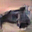

In [5]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained(
    "consistency/cifar10-32-demo",
    custom_pipeline="consistency/pipeline",
)

pipeline().images[0]  # Super Fast Generation! 🤯

In [7]:
print(pipeline.config)


FrozenDict({'unet': ('diffusers', 'UNet2DModel'), '_name_or_path': 'consistency/cifar10-32-demo'})


In [12]:
import os
from diffusers import DiffusionPipeline
from PIL import Image

# 加载预训练模型
pipeline = DiffusionPipeline.from_pretrained(
    "consistency/cifar10-32-demo",
    custom_pipeline="consistency/pipeline",
)

# 禁用进度条
pipeline.set_progress_bar_config(disable=True)

# 指定保存图片的文件夹路径
output_folder = "./1stepgenerated_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 生成10000张图片
num_images = 10000
for i in range(num_images):
    # 生成一张图片
    image = pipeline().images[0]
    
    # 将图片保存到文件夹
    image_path = os.path.join(output_folder, f"generated_image_{i+1}.png")
    image.save(image_path)

    # 每生成100张图片，打印一次进度
    if (i + 1) % 100 == 0:
        print(f"{i + 1}/{num_images} images generated and saved.")
        
print("Image generation complete!")


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
unet/diffusion_pytorch_model.safetensors not found
Loading pipeline components...:   0%|          | 0/1 [00:00<?, ?it/s]An error occurred while trying to fetch /home/codespace/.cache/huggingface/hub/models--consistency--cifar10-32-demo/snapshots/48a74149e3ba7b58c141ce66bcb4cbea5ec10253/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/codespace/.cache/huggingface/hub/models--consistency--cifar10-32-demo/snapshots/48a74149e3ba7b58c141ce66bcb4cbea5ec10253/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


100/10000 images generated and saved.
200/10000 images generated and saved.
300/10000 images generated and saved.
400/10000 images generated and saved.
500/10000 images generated and saved.
600/10000 images generated and saved.
700/10000 images generated and saved.
800/10000 images generated and saved.
900/10000 images generated and saved.
1000/10000 images generated and saved.
1100/10000 images generated and saved.
1200/10000 images generated and saved.
1300/10000 images generated and saved.
1400/10000 images generated and saved.
1500/10000 images generated and saved.
1600/10000 images generated and saved.
1700/10000 images generated and saved.
1800/10000 images generated and saved.
1900/10000 images generated and saved.
2000/10000 images generated and saved.
2100/10000 images generated and saved.
2200/10000 images generated and saved.
2300/10000 images generated and saved.
2400/10000 images generated and saved.
2500/10000 images generated and saved.
2600/10000 images generated and sa

In [ ]:
import os
from diffusers import DiffusionPipeline
from PIL import Image

# 加载预训练模型
pipeline = DiffusionPipeline.from_pretrained(
    "consistency/cifar10-32-demo",
    custom_pipeline="consistency/pipeline",
)

# 禁用进度条
pipeline.set_progress_bar_config(disable=True)

# 定义步数列表
steps_list = [2, 4, 8, 10]

# 每个步数生成10000张图片并保存
num_images = 10000

for steps in steps_list:
    # 为每个步数设置保存文件夹
    output_folder = f"./{steps}step_generated_images"
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # 生成图片
    for i in range(num_images):
        # 生成一张图片，指定步数
        image = pipeline(steps=steps).images[0]
        
        # 将图片保存到文件夹
        image_path = os.path.join(output_folder, f"generated_image_{i+1}.png")
        image.save(image_path)

        
        if (i + 1) % 500 == 0:
            print(f"{i + 1}/{num_images} images generated and saved for {steps} steps.")

print("Image generation complete!")


/home/codespace/.local/lib/python3.12/site-packages/tqdm-4.66.5-py3.12.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
unet/diffusion_pytorch_model.safetensors not found
Loading pipeline components...:   0%|          | 0/1 [00:00<?, ?it/s]An error occurred while trying to fetch /home/codespace/.cache/huggingface/hub/models--consistency--cifar10-32-demo/snapshots/48a74149e3ba7b58c141ce66bcb4cbea5ec10253/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/codespace/.cache/huggingface/hub/models--consistency--cifar10-32-demo/snapshots/48a74149e3ba7b58c141ce66bcb4cbea5ec10253/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]
/home/codespace/.local/lib/python3.12/site-packages/

500/10000 images generated and saved for 2 steps.
1000/10000 images generated and saved for 2 steps.
1500/10000 images generated and saved for 2 steps.
2000/10000 images generated and saved for 2 steps.
2500/10000 images generated and saved for 2 steps.
3000/10000 images generated and saved for 2 steps.
3500/10000 images generated and saved for 2 steps.
4000/10000 images generated and saved for 2 steps.
4500/10000 images generated and saved for 2 steps.
5000/10000 images generated and saved for 2 steps.
5500/10000 images generated and saved for 2 steps.
6000/10000 images generated and saved for 2 steps.
6500/10000 images generated and saved for 2 steps.
7000/10000 images generated and saved for 2 steps.
7500/10000 images generated and saved for 2 steps.
8000/10000 images generated and saved for 2 steps.
8500/10000 images generated and saved for 2 steps.
9000/10000 images generated and saved for 2 steps.
9500/10000 images generated and saved for 2 steps.
10000/10000 images generated and

  0%|          | 0/1 [00:00<?, ?it/s]/home/codespace/.local/lib/python3.12/site-packages/diffusers-0.30.3-py3.12.egg/diffusers/models/downsampling.py:240: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(kernel, device=hidden_states.device),
/home/codespace/.local/lib/python3.12/site-packages/diffusers-0.30.3-py3.12.egg/diffusers/models/upsampling.py:304: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(kernel, device=hidden_states.device),
100%|██████████| 1/1 [00:00<00:00,  5.84it/s]


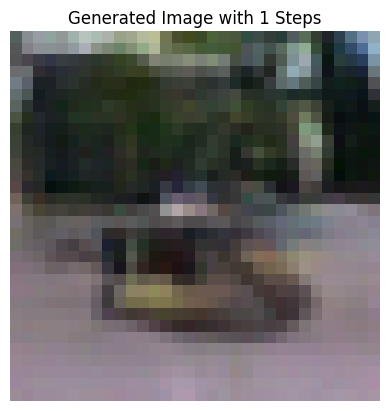

100%|██████████| 2/2 [00:00<00:00,  4.96it/s]


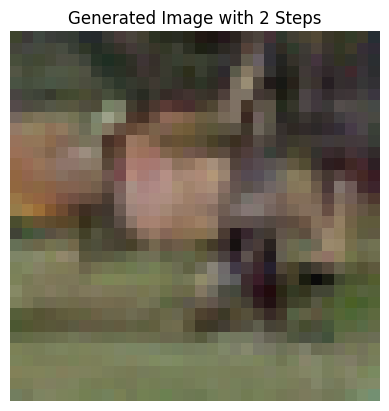

100%|██████████| 4/4 [00:00<00:00,  5.93it/s]


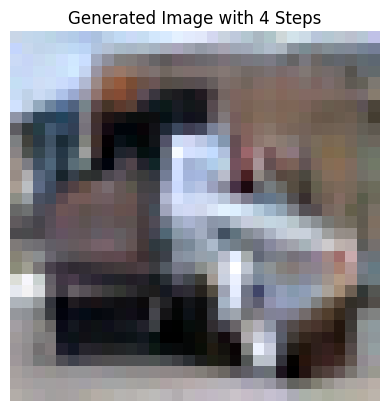

100%|██████████| 8/8 [00:01<00:00,  6.09it/s]


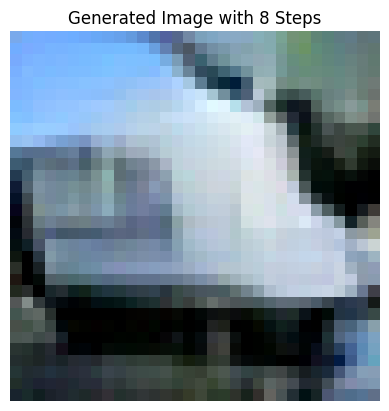

100%|██████████| 16/16 [00:03<00:00,  5.32it/s]


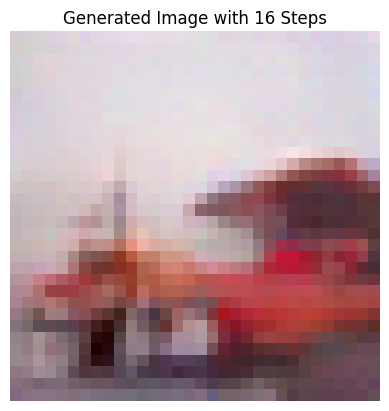

Image generation complete!


In [11]:
from PIL import Image
import matplotlib.pyplot as plt
steps_list = [1, 2, 4, 8, 16]

# 循环生成并保存每个步数对应的图片
for steps in steps_list:
    # 生成图片，指定 num_inference_steps 参数
    image = pipeline(steps=steps).images[0]


    # 展示图片
    plt.imshow(image)
    plt.title(f"Generated Image with {steps} Steps")
    plt.axis("off")  # 隐藏坐标轴
    plt.show()

print("Image generation complete!")
